In [1]:
import numpy as np

n_samples, n_features = 1000, 1
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)*1000
#positive integer target correlated with X[:, 5] with many zeros:
X


array([[ 1.76405235e+03],
       [ 4.00157208e+02],
       [ 9.78737984e+02],
       [ 2.24089320e+03],
       [ 1.86755799e+03],
       [-9.77277880e+02],
       [ 9.50088418e+02],
       [-1.51357208e+02],
       [-1.03218852e+02],
       [ 4.10598502e+02],
       [ 1.44043571e+02],
       [ 1.45427351e+03],
       [ 7.61037725e+02],
       [ 1.21675016e+02],
       [ 4.43863233e+02],
       [ 3.33674327e+02],
       [ 1.49407907e+03],
       [-2.05158264e+02],
       [ 3.13067702e+02],
       [-8.54095739e+02],
       [-2.55298982e+03],
       [ 6.53618595e+02],
       [ 8.64436199e+02],
       [-7.42165020e+02],
       [ 2.26975462e+03],
       [-1.45436567e+03],
       [ 4.57585173e+01],
       [-1.87183850e+02],
       [ 1.53277921e+03],
       [ 1.46935877e+03],
       [ 1.54947426e+02],
       [ 3.78162520e+02],
       [-8.87785748e+02],
       [-1.98079647e+03],
       [-3.47912149e+02],
       [ 1.56348969e+02],
       [ 1.23029068e+03],
       [ 1.20237985e+03],
       [-3.8

In [4]:
!pip install -U pandas==1.5.3 # because current version of pandas has problem converting to Spark SQL DF


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [5]:
XL=[]
for i in X:
    XL.append(abs(round(i[0])))

XL



[1764,
 400,
 979,
 2241,
 1868,
 977,
 950,
 151,
 103,
 411,
 144,
 1454,
 761,
 122,
 444,
 334,
 1494,
 205,
 313,
 854,
 2553,
 654,
 864,
 742,
 2270,
 1454,
 46,
 187,
 1533,
 1469,
 155,
 378,
 888,
 1981,
 348,
 156,
 1230,
 1202,
 387,
 302,
 1049,
 1420,
 1706,
 1951,
 510,
 438,
 1253,
 777,
 1614,
 213,
 895,
 387,
 511,
 1181,
 28,
 428,
 67,
 302,
 634,
 363,
 672,
 360,
 813,
 1726,
 177,
 402,
 1630,
 463,
 907,
 52,
 729,
 129,
 1139,
 1235,
 402,
 685,
 871,
 579,
 312,
 56,
 1165,
 901,
 466,
 1536,
 1488,
 1896,
 1179,
 180,
 1071,
 1054,
 403,
 1222,
 208,
 977,
 356,
 707,
 11,
 1786,
 127,
 402,
 1883,
 1348,
 1270,
 969,
 1173,
 1944,
 414,
 747,
 1923,
 1481,
 1868,
 906,
 861,
 1910,
 268,
 802,
 947,
 155,
 614,
 922,
 376,
 1099,
 298,
 1326,
 695,
 150,
 435,
 1849,
 672,
 407,
 770,
 539,
 674,
 32,
 636,
 676,
 577,
 208,
 396,
 1093,
 1491,
 439,
 167,
 635,
 2383,
 944,
 913,
 1117,
 1316,
 462,
 68,
 1713,
 745,
 826,
 98,
 663,
 1127,
 1080,
 1147,
 

In [6]:
y=[]
probabilityOfEachTrial=0.5
for i in XL:
    y.append(rng.binomial(abs(i),probabilityOfEachTrial)/10000)


In [7]:
YL=list(y)
YL

[0.0894,
 0.0207,
 0.0493,
 0.1072,
 0.0924,
 0.0458,
 0.0494,
 0.0076,
 0.0052,
 0.0218,
 0.0071,
 0.0768,
 0.0378,
 0.0059,
 0.0218,
 0.0182,
 0.0736,
 0.0104,
 0.016,
 0.0439,
 0.1284,
 0.0326,
 0.0437,
 0.0348,
 0.1141,
 0.0717,
 0.0017,
 0.0092,
 0.0768,
 0.0758,
 0.0085,
 0.0173,
 0.046,
 0.1017,
 0.0169,
 0.0081,
 0.0625,
 0.06,
 0.0189,
 0.016,
 0.0527,
 0.0709,
 0.083,
 0.0992,
 0.0271,
 0.0218,
 0.0623,
 0.0416,
 0.0793,
 0.0103,
 0.0465,
 0.0199,
 0.0237,
 0.0565,
 0.0015,
 0.0229,
 0.0027,
 0.0147,
 0.0321,
 0.0173,
 0.0323,
 0.0192,
 0.04,
 0.0871,
 0.0086,
 0.021,
 0.0836,
 0.0245,
 0.0477,
 0.0027,
 0.035,
 0.0067,
 0.0551,
 0.0611,
 0.0219,
 0.0332,
 0.044,
 0.0287,
 0.0146,
 0.0022,
 0.0576,
 0.0423,
 0.0234,
 0.0781,
 0.0753,
 0.0919,
 0.0593,
 0.0091,
 0.0531,
 0.0527,
 0.0187,
 0.0629,
 0.0113,
 0.0492,
 0.0186,
 0.0348,
 0.0006,
 0.0902,
 0.0069,
 0.0206,
 0.0933,
 0.0677,
 0.0652,
 0.0495,
 0.058,
 0.0976,
 0.0209,
 0.0364,
 0.0981,
 0.0724,
 0.0924,
 0.0448,
 0.0

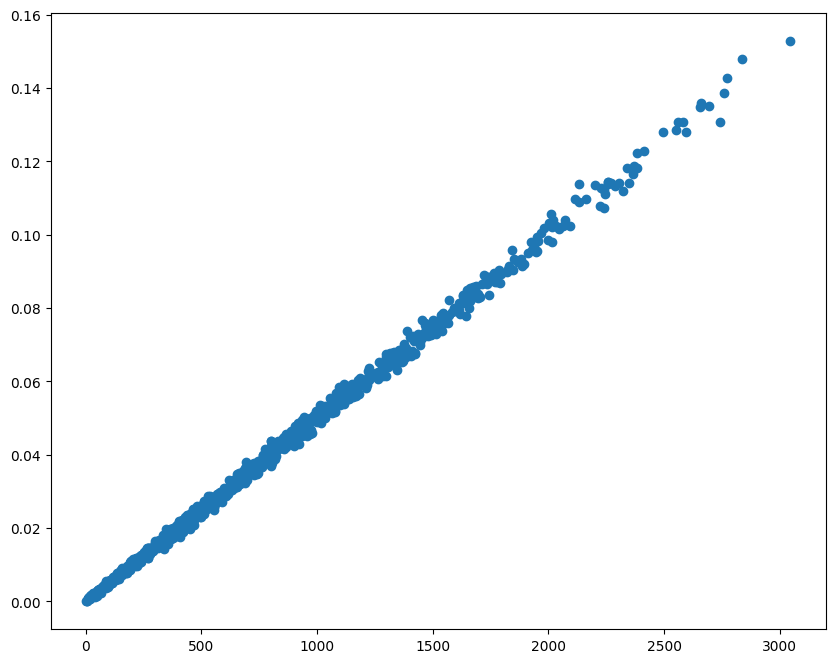

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 8))
plt.scatter(XL, YL);

In [9]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext(master = 'local')

from pyspark.sql import SparkSession
spark = SparkSession.builder \
          .appName("Python Spark SQL basic example") \
          .config("spark.some.config.option", "some-value") \
          .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/10/18 23:32:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
from pyspark.sql.types import List
from pyspark.ml.linalg import Vectors
import pandas as pd
frame={'features':XL,'label':YL}
df=pd.DataFrame(frame)
df
#cuse=spark.createDataFrame(df)


,features,label
0,1764,0.0894
1,400,0.0207
2,979,0.0493
3,2241,0.1072
4,1868,0.0924
...,...,...
995,413,0.0197
996,198,0.0110
997,94,0.0045
998,1148,0.0583


In [11]:
cuse=spark.createDataFrame(df)

/Users/user/Documents/docker/spark/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/Users/user/Documents/docker/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [12]:
cuse.show(5)

+--------+------+
|features| label|
+--------+------+
|    1764|0.0894|
|     400|0.0207|
|     979|0.0493|
|    2241|0.1072|
|    1868|0.0924|
+--------+------+
only showing top 5 rows



In [13]:
cuse=cuse.rdd.map(lambda x: [Vectors.dense(x[0]), x[-1]]).toDF(["features", "label"])



In [14]:
# assemble all feature columns into on single vector column
#from pyspark.ml.feature import VectorAssembler
#assembler = VectorAssembler(inputCols=['x'], outputCol='features')
#cuse_df_2 = assembler.transform(cuse).withColumnRenamed('y', 'label')
cuse_df_2=cuse
cuse_df_2.show(5)

+--------+------+
|features| label|
+--------+------+
|[1764.0]|0.0894|
| [400.0]|0.0207|
| [979.0]|0.0493|
|[2241.0]|0.1072|
|[1868.0]|0.0924|
+--------+------+
only showing top 5 rows



In [15]:
# split data into training and test datasets
training, test = cuse_df_2.randomSplit([0.8, 0.2], seed=1234)
training.show(5)


+--------+------+
|features| label|
+--------+------+
|   [1.0]|   0.0|
|   [5.0]|1.0E-4|
|   [9.0]|5.0E-4|
|  [11.0]|5.0E-4|
|  [11.0]|6.0E-4|
+--------+------+
only showing top 5 rows



In [16]:
## ======= build cross validation model ===========

# estimator
from pyspark.ml.regression import GeneralizedLinearRegression
glm = GeneralizedLinearRegression(featuresCol='features', labelCol='label', family='binomial')

# parameter grid
from pyspark.ml.tuning import ParamGridBuilder
param_grid = ParamGridBuilder().\
    addGrid(glm.regParam, [0, 0.5, 1, 2, 4]).\
    build()
    
# evaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction')

# build cross-validation model
from pyspark.ml.tuning import CrossValidator
cv = CrossValidator(estimator=glm, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=4)

In [17]:
# fit model
# cv_model = cv.fit(training)
cv_model = cv.fit(cuse_df_2)

23/10/18 23:32:40 WARN Instrumentation: [97c48730] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:40 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/18 23:32:40 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/10/18 23:32:40 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/10/18 23:32:40 WARN Instrumentation: [97c48730] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:40 WARN Instrumentation: [97c48730] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:40 WARN Instrumentation: [97c48730] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:40 WARN Instrumentation: [97c48730] regParam is zero, which might cause numerical instability and overfitting.


23/10/18 23:32:50 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:50 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:50 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:51 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:51 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:51 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:32:51 WARN Instrumentation: [2c1adb90] regParam is zero, which might cause numerical instability and overfitting.


In [18]:
# prediction
pred_training_cv = cv_model.transform(training)
pred_test_cv = cv_model.transform(test)

pred_training_cv.show(5)
pred_test_cv.show(5, truncate=False)

+--------+------+--------------------+
|features| label|          prediction|
+--------+------+--------------------+
|   [1.0]|   0.0|0.014156569008065544|
|   [5.0]|1.0E-4|0.014215963727330165|
|   [9.0]|5.0E-4| 0.01427560403215934|
|  [11.0]|5.0E-4|0.014305516586863333|
|  [11.0]|6.0E-4|0.014305516586863333|
+--------+------+--------------------+
only showing top 5 rows

+--------+------+--------------------+
|features|label |prediction          |
+--------+------+--------------------+
|[4.0]   |1.0E-4|0.014201092062267147|
|[10.0]  |6.0E-4|0.014290552596472574|
|[25.0]  |0.0016|0.014516640864843748|
|[31.0]  |0.0017|0.014608059759046417|
|[32.0]  |0.0016|0.014623351286719944|
+--------+------+--------------------+
only showing top 5 rows



In [19]:
cv_model.bestModel.coefficients

DenseVector([0.0011])

In [20]:
cv_model.bestModel.intercept

-4.244380550563168

In [21]:
#cv_model.bestModel

In [22]:
evaluator.evaluate(pred_training_cv)

0.0

In [23]:
evaluator.evaluate(pred_test_cv)

0.0

In [24]:
pred_test_cv.show(5)

+--------+------+--------------------+
|features| label|          prediction|
+--------+------+--------------------+
|   [4.0]|1.0E-4|0.014201092062267147|
|  [10.0]|6.0E-4|0.014290552596472574|
|  [25.0]|0.0016|0.014516640864843748|
|  [31.0]|0.0017|0.014608059759046417|
|  [32.0]|0.0016|0.014623351286719944|
+--------+------+--------------------+
only showing top 5 rows



In [25]:
X=[]
for i in pred_test_cv.rdd.map(lambda x: [x[0][0]]).collect():
    X.append(i[0])
L=[]

for i in pred_test_cv.rdd.map(lambda x: [x[1]]).collect():
    L.append(i[0])
P=[]
for i in pred_test_cv.rdd.map(lambda x: [x[2]]).collect():
    P.append(i[0])


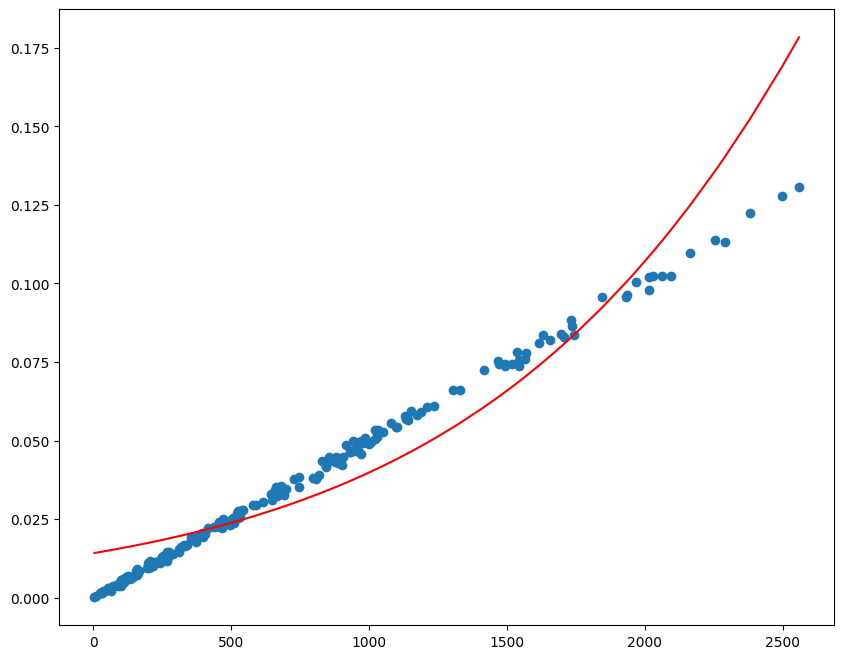

In [26]:
plt.figure(figsize = (10, 8))
plt.scatter(X, L);
plt.plot(X, P,'r-');

In [27]:
## ======= build cross validation model ===========

# estimator
from pyspark.ml.regression import GeneralizedLinearRegression
glm = GeneralizedLinearRegression(featuresCol='features', labelCol='label', family='tweedie')

# parameter grid
from pyspark.ml.tuning import ParamGridBuilder
param_grid = ParamGridBuilder().\
    addGrid(glm.regParam, [0, 0.5, 1, 2, 4]).\
    build()
    
# evaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction')

# build cross-validation model
from pyspark.ml.tuning import CrossValidator
cv = CrossValidator(estimator=glm, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=4)

In [28]:
# fit model
# cv_model = cv.fit(training)
cv_model = cv.fit(cuse_df_2)

23/10/18 23:33:23 WARN Instrumentation: [9cb44d16] regParam is zero, which might cause numerical instability and overfitting.


23/10/18 23:33:24 WARN Instrumentation: [7142598f] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:33:25 WARN Instrumentation: [5014fed5] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:33:27 WARN Instrumentation: [640b6ed9] regParam is zero, which might cause numerical instability and overfitting.
23/10/18 23:33:28 WARN Instrumentation: [1c39b00c] regParam is zero, which might cause numerical instability and overfitting.


In [29]:
# prediction
pred_training_cv = cv_model.transform(training)
pred_test_cv = cv_model.transform(test)

pred_training_cv.show(5)
pred_test_cv.show(5, truncate=False)

+--------+------+--------------------+
|features| label|          prediction|
+--------+------+--------------------+
|   [1.0]|   0.0|-4.58335977677641...|
|   [5.0]|1.0E-4|1.545580505383662...|
|   [9.0]|5.0E-4|3.549496988444966E-4|
|  [11.0]|5.0E-4|4.551455229975618E-4|
|  [11.0]|6.0E-4|4.551455229975618E-4|
+--------+------+--------------------+
only showing top 5 rows

+--------+------+---------------------+
|features|label |prediction           |
+--------+------+---------------------+
|[4.0]   |1.0E-4|1.0446013846183365E-4|
|[10.0]  |6.0E-4|4.050476109210292E-4 |
|[25.0]  |0.0016|0.001156516292069018 |
|[31.0]  |0.0017|0.0014571037645282137|
|[32.0]  |0.0016|0.0015072016766047463|
+--------+------+---------------------+
only showing top 5 rows



In [30]:
cv_model.bestModel.coefficients

DenseVector([0.0001])

In [31]:
cv_model.bestModel.intercept

-9.593150984429675e-05

In [32]:
evaluator.evaluate(pred_training_cv)

0.0

In [33]:
evaluator.evaluate(pred_test_cv)

0.0

In [34]:
X=[]
for i in pred_test_cv.rdd.map(lambda x: [x[0][0]]).collect():
    X.append(i[0])
L=[]

for i in pred_test_cv.rdd.map(lambda x: [x[1]]).collect():
    L.append(i[0])
P=[]
for i in pred_test_cv.rdd.map(lambda x: [x[2]]).collect():
    P.append(i[0])

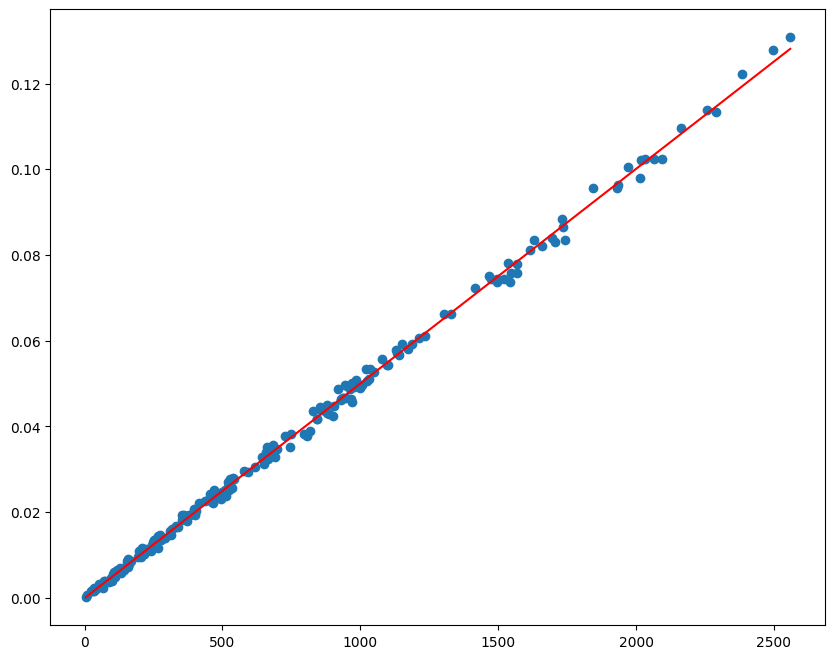

In [35]:
plt.figure(figsize = (10, 8))
plt.scatter(X, L);
plt.plot(X, P,'r-');